In [156]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [157]:
import os

stream = os.popen('pip list')
pip_list = stream.read()
packages = pip_list.split('\n')

numpy_2_1_0_installed = False
numpy_2_1_1_installed = False

for package in packages:
    if package.startswith('numpy'):
        package_info = package.split()
        if len(package_info) >= 2:
            if package_info[1] == '2.1.0':
                numpy_2_1_0_installed = True
                break
            elif package_info[1] == '2.1.1':
                numpy_2_1_1_installed = True
                break

if numpy_2_1_0_installed:
    print("numpy 2.1.0 is installed")
elif numpy_2_1_1_installed:
    print("numpy 2.1.1 is installed")
else:
    print("Neither numpy 2.1.0 nor 2.1.1 is installed")

numpy 2.1.0 is installed


In [158]:
## Q2
def plot_polynomial(coeffs, z_range, color='b'):
    z_min, z_max = z_range
    z = np.linspace(z_min, z_max)
    
    # Calcola i valori del polinomio
    y = np.polyval(coeffs[::-1], z)
    
    plt.figure(figsize=(10, 6))
    plt.plot(z, y, color=color)
    plt.xlabel('z')
    plt.ylabel('p(z)')
    plt.title('Polynomial Function')
    plt.grid(True)
    plt.show()


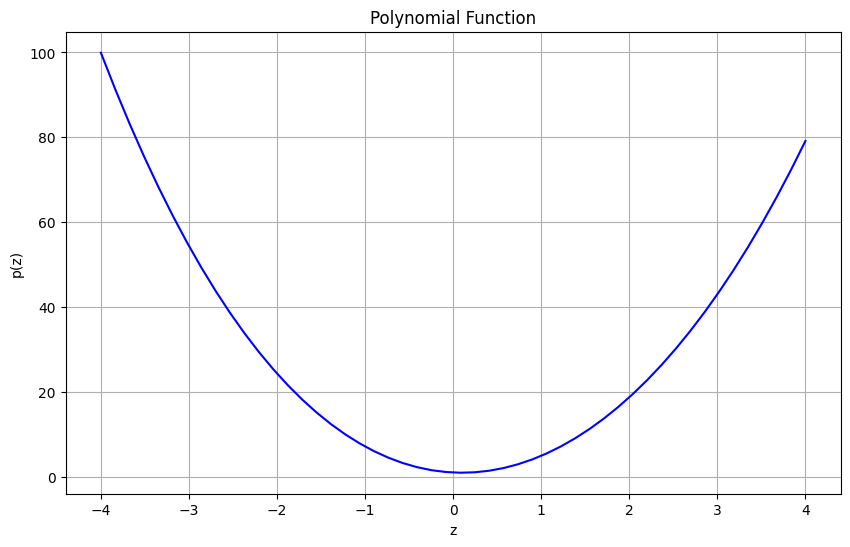

In [159]:
coeffs = [1, -1,5, -0.1, 1/30]  # [w4, w3, w2, w1, w0]
plot_polynomial(coeffs, [-4, 4])

In [160]:
def create_dataset(coeffs, z_range, sample_size, sigma, seed=42):
    # Set random seeds for reproducibility
    torch.manual_seed(seed)
    np.random.seed(seed)
    
    # Unpack z_range
    z_min, z_max = z_range
    
    # Generate evenly spaced z values
    z = torch.linspace(z_min, z_max, sample_size)
    
    # Create the design matrix X
    X = torch.stack([z**i for i in range(len(coeffs))]).T
    
    # Calculate y_hat (noiseless y)
    y_hat = X @ torch.tensor(coeffs, dtype=torch.float32)
    
    # Add Gaussian noise to get y
    noise = torch.normal(0, sigma, size=y_hat.shape)
    y = y_hat + noise
    
    return X, y

In [161]:
## Q4
# Set di training
X_train, y_train = create_dataset(coeffs, [-2, 2], 500, 0.5, seed=0)

# Set di validazione
X_val, y_val = create_dataset(coeffs, [-2, 2], 500, 0.5, seed=1)

In [162]:
def visualize_data(X, y, coeffs, z_range, title):
    z_min, z_max = z_range
    z = np.linspace(z_min, z_max)
    y_true = np.polyval(coeffs[::-1], z)

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot true polynomial
    ax.plot(z, y_true, color='r', label='True Polynomial', linewidth=2)
    
    # Scatter plot of generated data
    ax.scatter(X[:, 1], y, alpha=0.5, label='Generated Data', color='b', edgecolor='k')
    
    # Set labels and title
    ax.set_xlabel('z', fontsize=12)
    ax.set_ylabel('p(z)', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add legend
    ax.legend(fontsize=10)
    
    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()



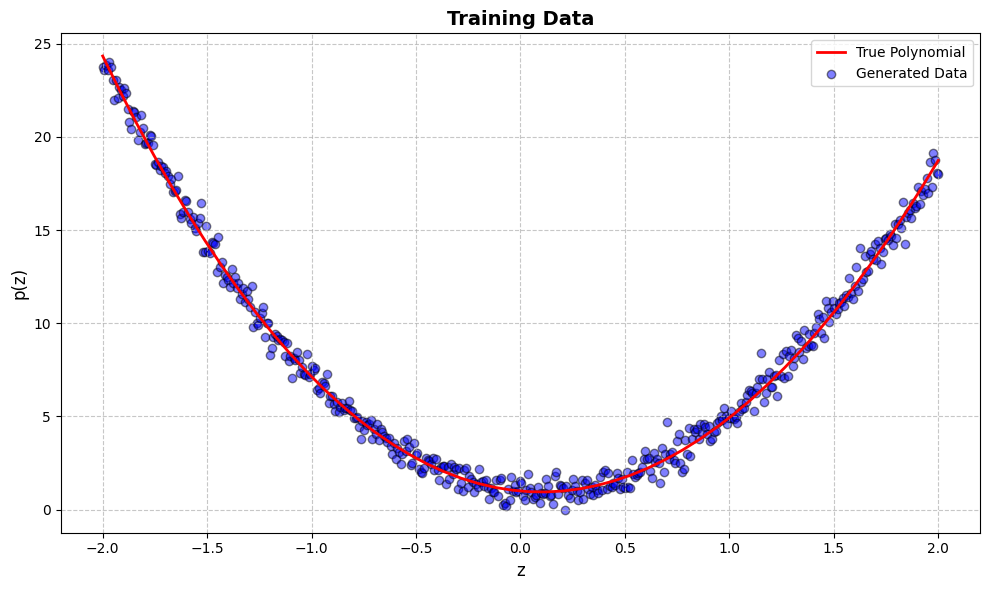

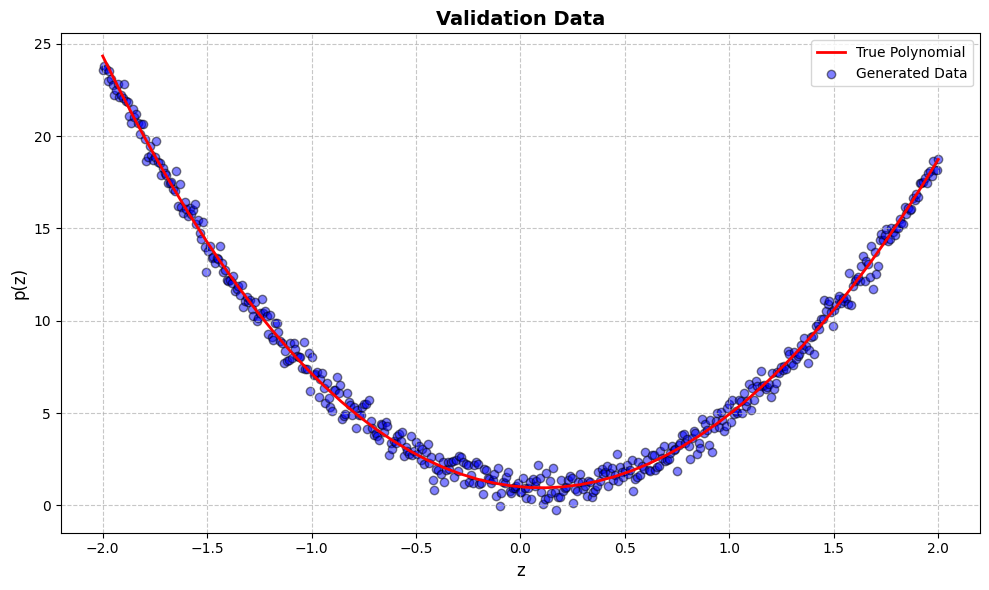

In [163]:
coeffs = [1, -1, 5, -0.1, 1/30]  # [w0, w1, w2, w3, w4]
visualize_data(X_train, y_train, coeffs, [-2, 2], "Training Data")
visualize_data(X_val, y_val, coeffs, [-2, 2], "Validation Data")

cuda
torch.Size([500, 5]) torch.Size([500]) torch.Size([500, 5]) torch.Size([500])
Step: 0 - Loss eval: 29.96559715270996
Step: 1 - Loss eval: 12.312127113342285
Step: 2 - Loss eval: 9.746719360351562
Step: 3 - Loss eval: 9.123261451721191
Step: 4 - Loss eval: 8.782021522521973
Step: 5 - Loss eval: 8.504766464233398
Step: 6 - Loss eval: 8.256302833557129
Step: 7 - Loss eval: 8.026703834533691
Step: 8 - Loss eval: 7.811017990112305
Step: 9 - Loss eval: 7.6061811447143555
Step: 10 - Loss eval: 7.410200119018555
Step: 11 - Loss eval: 7.2217631340026855
Step: 12 - Loss eval: 7.0399861335754395
Step: 13 - Loss eval: 6.864260673522949
Step: 14 - Loss eval: 6.694149017333984
Step: 15 - Loss eval: 6.529326438903809
Step: 16 - Loss eval: 6.369536876678467
Step: 17 - Loss eval: 6.214572429656982
Step: 18 - Loss eval: 6.064248085021973
Step: 19 - Loss eval: 5.9184041023254395
Step: 20 - Loss eval: 5.776893615722656
Step: 21 - Loss eval: 5.639578819274902
Step: 22 - Loss eval: 5.506326675415039
St

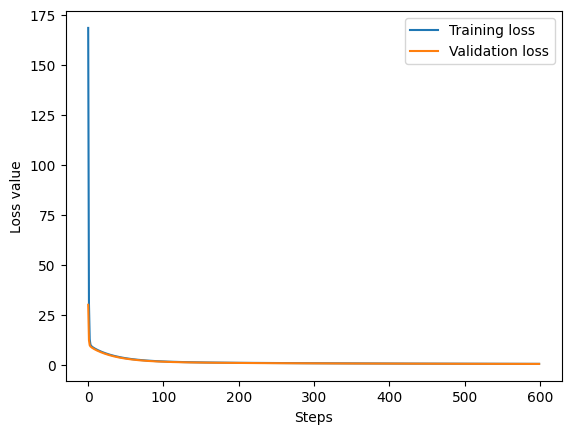

Training done, with an evaluation loss of 0.3816390037536621
Final w: Parameter containing:
tensor([[ 1.6123, -0.8473,  4.0059, -0.1555,  0.2834]], requires_grad=True) Final b:
 None


In [164]:
# Q6
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(DEVICE)
model = nn.Linear(5, 1,False) 
loss_fn = nn.MSELoss() 
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
train_loss_vals = []
val_loss_vals = []
pesi = []
n_steps = 600 # Number of updates of the gradient
for step in range(n_steps):
    model.train() # Set the model in training mode
    # Set the gradient to 0
    optimizer.zero_grad() # Or model.zero_grad()
    # Compute the output of the model
    y_hat = model(X_train)
    # Compute the loss
    loss = loss_fn(y_hat, y_train)
    # Compute the gradient
    loss.backward()
    # Update the parameters
    optimizer.step()
    # *** Evaluation ***
    # Here we do things that do not contribute to the gradient computation
    model.eval() # Set the model in evaluation mode
    with torch.no_grad(): #
        # Compute the output of the model
        y_hat_val = model(X_val)
        # Compute the loss
        loss_val = loss_fn(y_hat_val, y_val)
        # Compute the output of the model
        val_loss_vals.append(loss_val.item())
        train_loss_vals.append(loss.item())
        # At every step, print the losses
        pesi.append(model.weight.flatten().tolist())
        print("Step:", step, "- Loss eval:", loss_val.item())
        # Do also a very simple plot
plt.plot(range(step + 1), train_loss_vals)
plt.plot(range(step + 1), val_loss_vals)
plt.legend(["Training loss", "Validation loss"])
plt.xlabel("Steps")
plt.ylabel("Loss value")
plt.show()
print("Training done, with an evaluation loss of {}".format(loss_val.item()))

# Get the final value of the parameters
print("Final w:", model.weight, "Final b:\n", model.bias)

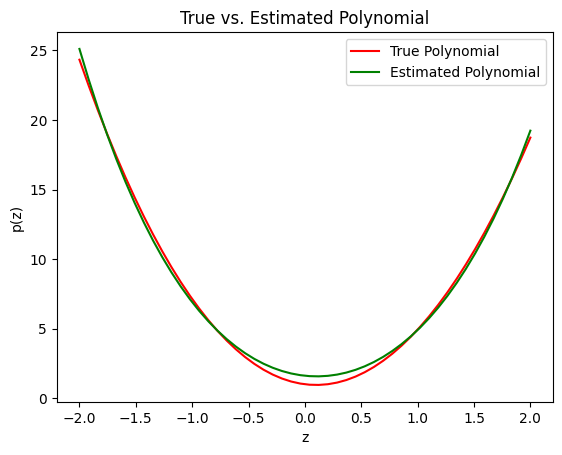

In [165]:


z_min, z_max = [-2,2]
z = np.linspace(z_min, z_max)
# Compute the true polynomial
y_true = np.polyval(coeffs[::-1], z)
est_weight = model.weight.flatten().tolist()
est_coeffs = est_weight[::-1]
est_y = np.polyval(est_coeffs, z)


plt.plot(z, y_true, color='r', label='True Polynomial')
plt.plot(z, est_y, color='g', label='Estimated Polynomial')
plt.title("True vs. Estimated Polynomial")
plt.xlabel('z')
plt.ylabel('p(z)')
plt.legend()
plt.show()

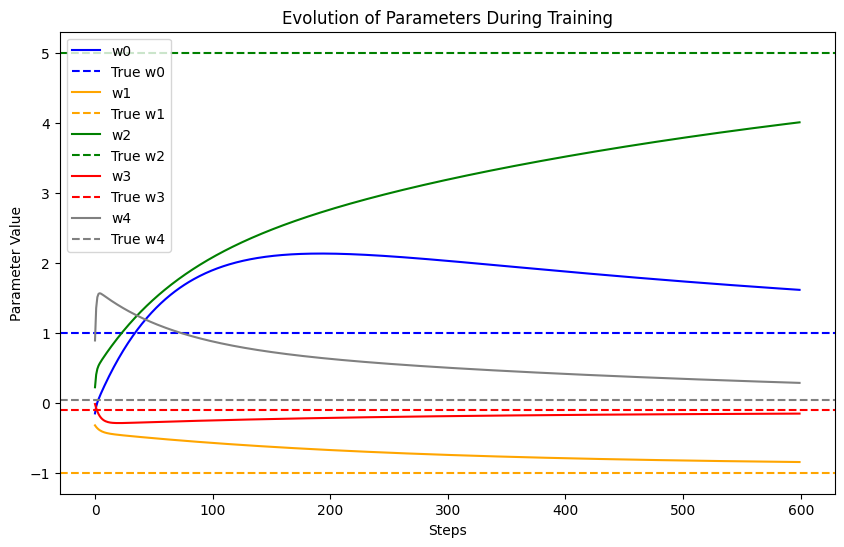

In [166]:
# Define colors and labels
colors = ['blue', 'orange', 'green', 'red', 'gray']
labels = [f'w{i}' for i in range(5)]

# Convert weight list to numpy array
weight_array = np.array(pesi)

# Function to plot weights and true values
def plot_weights(weights, true_values, n_steps, colors, labels):
    # Loop over weights, true values, colors, and labels to plot
    for i, (weight, true_value, color, label) in enumerate(zip(weights.T, true_values, colors, labels)):
        # Plot the weights for each parameter
        plt.plot(np.arange(n_steps), weight, label=f'{label}', color=color)
        # Plot the true value as a horizontal dashed line
        plt.axhline(y=true_value, linestyle='--', label=f'True {label}', color=color)

# Plot the weights
plt.figure(figsize=(10, 6))  # Set figure size
plot_weights(weight_array, coeffs, n_steps, colors, labels)  # Call the plot function

# Add labels, title, and legend
plt.xlabel('Steps')  # Label for x-axis
plt.ylabel('Parameter Value')  # Label for y-axis
plt.title('Evolution of Parameters During Training')  # Title of the plot
plt.legend()  # Show legend

# Display the plot
plt.show()


Bonus

Step: 0 - Loss eval: 14.405984878540039
Step: 1 - Loss eval: 13.845175743103027
Step: 2 - Loss eval: 13.3065824508667
Step: 3 - Loss eval: 12.789327621459961
Step: 4 - Loss eval: 12.292561531066895
Step: 5 - Loss eval: 11.815476417541504
Step: 6 - Loss eval: 11.357291221618652
Step: 7 - Loss eval: 10.917254447937012
Step: 8 - Loss eval: 10.49465274810791
Step: 9 - Loss eval: 10.088791847229004
Step: 10 - Loss eval: 9.699007987976074
Step: 11 - Loss eval: 9.324666976928711
Step: 12 - Loss eval: 8.965154647827148
Step: 13 - Loss eval: 8.61988353729248
Step: 14 - Loss eval: 8.288291931152344
Step: 15 - Loss eval: 7.9698357582092285
Step: 16 - Loss eval: 7.663995742797852
Step: 17 - Loss eval: 7.370270729064941
Step: 18 - Loss eval: 7.0881805419921875
Step: 19 - Loss eval: 6.817267417907715
Step: 20 - Loss eval: 6.557085037231445
Step: 21 - Loss eval: 6.307210445404053
Step: 22 - Loss eval: 6.067234516143799
Step: 23 - Loss eval: 5.836764812469482
Step: 24 - Loss eval: 5.615424633026123
St

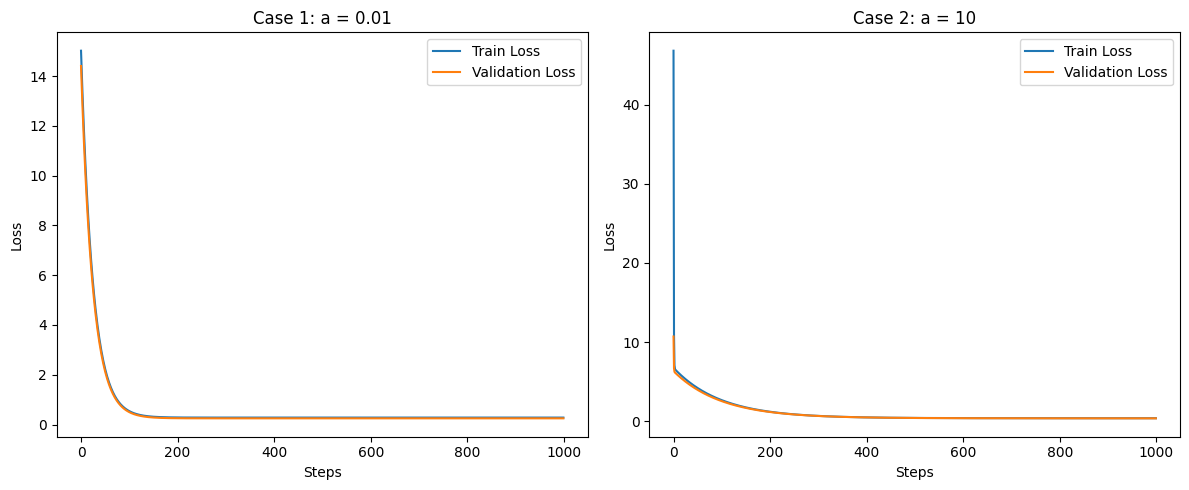

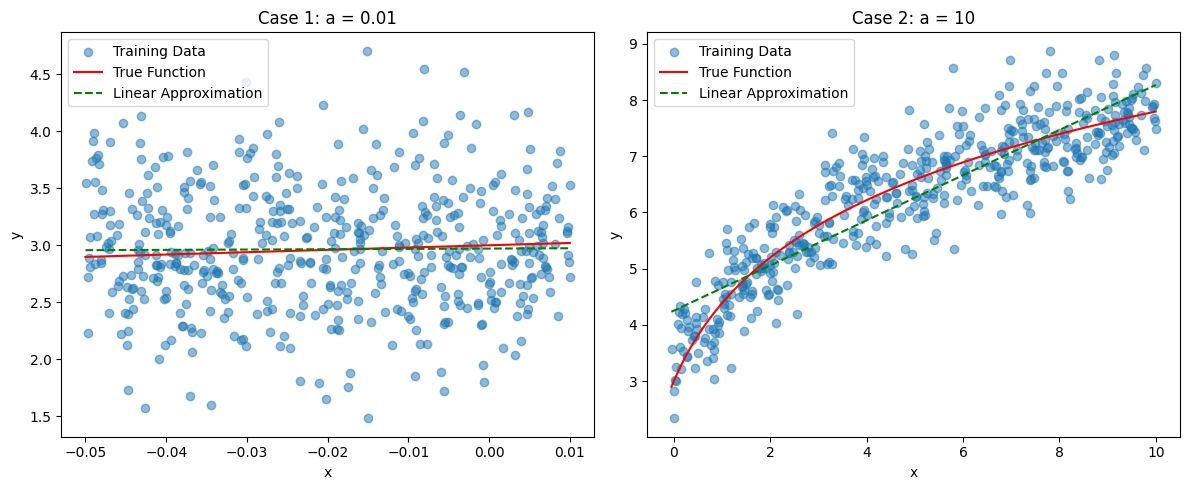

In [167]:
def create_dataset_log(f, x_range, sample_size, sigma, seed=42):
    torch.manual_seed(seed)
    x_min, x_max = x_range
    X = torch.rand(sample_size) * (x_max - x_min) + x_min
    y = f(X) + torch.normal(torch.zeros(sample_size), sigma*torch.ones(sample_size))
    return X.reshape(-1, 1), y.reshape(-1, 1)

def f(x):
    return 2 * torch.log(x + 1) + 3

def train_and_evaluate(X_train, y_train, X_val, y_val, learning_rate=0.01, n_steps=1000):
    model = nn.Linear(1, 1, True)
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    train_losses = []
    val_losses = []
    
    for step in range(n_steps):
        model.train()
        optimizer.zero_grad()
        y_hat = model(X_train)
        loss = loss_fn(y_hat, y_train)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            y_hat_val = model(X_val)
            loss_val = loss_fn(y_hat_val, y_val)
            val_losses.append(loss_val.item())
            train_losses.append(loss.item())
            print("Step:", step, "- Loss eval:", loss_val.item())
    
    return model, train_losses, val_losses

# Case 1: a = 0.01
x_range1 = (-0.05, 0.01)
# Case 2: a = 10
x_range2 = (-0.05, 10)

sample_size = 500 # 500
sigma = 0.5 # 0.1

X_train1, y_train1 = create_dataset_log(f, x_range1, sample_size, sigma, seed=0)
X_val1, y_val1 = create_dataset_log(f, x_range1, sample_size , sigma, seed=1)

X_train2, y_train2 = create_dataset_log(f, x_range2, sample_size, sigma, seed=0)
X_val2, y_val2 = create_dataset_log(f, x_range2, sample_size , sigma, seed=1)
# print(X_train1.shape)
# print(y_train1.shape)
# print(X_val1.shape)
# print(y_val1.shape)
# print(X_train2.shape)
# print(y_train2.shape)
# print(X_val2.shape)
# print(y_val2.shape)
model1, train_losses1, val_losses1 = train_and_evaluate(X_train1, y_train1, X_val1, y_val1)
model2, train_losses2, val_losses2 = train_and_evaluate(X_train2, y_train2, X_val2, y_val2)

print(f"Final validation loss for case 1 (a = 0.01): {val_losses1[-1]:.6f}")
print(f"Final validation loss for case 2 (a = 10): {val_losses2[-1]:.6f}")

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses1, label='Train Loss')
plt.plot(val_losses1, label='Validation Loss')
plt.title('Case 1: a = 0.01')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses2, label='Train Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.title('Case 2: a = 10')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting the true function and linear approximations
x1 = torch.linspace(-0.05, 0.01, 100).reshape(-1, 1)
x2 = torch.linspace(-0.05, 10, 100).reshape(-1, 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train1, y_train1, alpha=0.5, label='Training Data')
plt.plot(x1, f(x1), 'r-', label='True Function')
plt.plot(x1, model1(x1).detach(), 'g--', label='Linear Approximation')
plt.title('Case 1: a = 0.01')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train2, y_train2, alpha=0.5, label='Training Data')
plt.plot(x2, f(x2), 'r-', label='True Function')
plt.plot(x2, model2(x2).detach(), 'g--', label='Linear Approximation')
plt.title('Case 2: a = 10')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()